Generated from Perplexity and modified on Cursor

In [10]:
# if requirements file is updated

# pip install -r requirements.txt

# if setup file is updated
# pip install .

In [11]:
import torch
from transformers import BertTokenizer, BertModel
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt


In [23]:
def get_word_embeddings(text, word, model, tokenizer):
    # Tokenize input
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    
    # Generate output
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get embeddings for the [CLS] token
    embeddings = outputs.last_hidden_state
    
    # Find indices of the target word
    word_ids = inputs['input_ids'].squeeze().tolist()
    word_tokens = tokenizer.convert_ids_to_tokens(word_ids)
    word_indices = [i for i, token in enumerate(word_tokens) if word in token]
    
    # Average the embeddings for the target word
    # Flatten the embeddings to 1-D
    word_embeddings = torch.mean(embeddings[:, word_indices, :], dim=1).squeeze()   
    return word_embeddings

def measure_polysemy(texts, word, model_name='bert-base-uncased'):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name, output_hidden_states=True)
    
    embeddings = []
    for text in texts:
        if word in text:
            embeddings.append(get_word_embeddings(text, word, model, tokenizer))
        else:
            pass
    
    # Measure distances between embeddings
    distances = []
    for i in range(len(embeddings)):
        for j in range(i + 1, len(embeddings)):
            distance = cosine(embeddings[i].numpy().flatten(), embeddings[j].numpy().flatten())
            distances.append(distance)
    
    return distances

# Example usage
texts = [
    "The bank can guarantee deposits will eventually cover future tuition costs because it invests in adjustable-rate mortgage securities.",
    "It's on the left bank of the river.",
    "She deposited the money in the bank."
]

word = "on"
distances = measure_polysemy(texts, word)
print("Distances between embeddings:", distances)

Distances between embeddings: [0.7669081720292908, 0.7451063183749413, 0.5890246920153703]


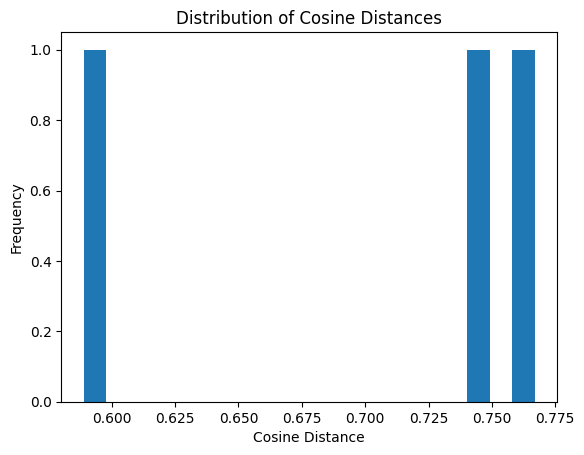

In [24]:
plt.hist(distances, bins=20)
plt.title("Distribution of Cosine Distances")
plt.xlabel("Cosine Distance")
plt.ylabel("Frequency")
plt.show()



In [25]:
!pipreqs --encoding utf-8 "C:\Users\Srikanth\My Drive (siyer5@binghamton.edu)\Binghamton\Spring 2024 Courses\SSIE 519- Soft Computing- Sadamori Kojaku\SSIE 519 Soft Computing Final project- Srikanth, Annajirao" --force

INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in C:\Users\Srikanth\My Drive (siyer5@binghamton.edu)\Binghamton\Spring 2024 Courses\SSIE 519- Soft Computing- Sadamori Kojaku\SSIE 519 Soft Computing Final project- Srikanth, Annajirao\requirements.txt
